In [1]:
from sklearn.datasets import make_classification
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import PrecisionRecallDisplay, confusion_matrix

# Import models
from tensorflow import keras
from keras import models, layers, activations, losses, optimizers, metrics
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

keras.utils.set_random_seed(42)

2023-10-24 21:50:36.933438: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X,y = make_classification(n_samples=10000, n_features=16, n_informative=8,
                          n_redundant=8,
                          n_classes=2, n_clusters_per_class=2, class_sep=1.5, 
                          flip_y=0, weights=[0.90, 0.1], random_state=1)

In [3]:
X_scaled = MinMaxScaler().fit_transform(X) 
X_scaled = pd.DataFrame(X_scaled)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
0,10000.0,0.416471,0.099828,0.0,0.349095,0.412513,0.480775,1.0
1,10000.0,0.428229,0.116394,0.0,0.348317,0.426629,0.505431,1.0
2,10000.0,0.385499,0.133452,0.0,0.291633,0.364860,0.464234,1.0
3,10000.0,0.540382,0.126205,0.0,0.460692,0.544699,0.624723,1.0
4,10000.0,0.562678,0.125384,0.0,0.483306,0.565994,0.645655,1.0
5,10000.0,0.505710,0.126982,0.0,0.423097,0.505487,0.586861,1.0
6,10000.0,0.442865,0.120215,0.0,0.362178,0.437331,0.516608,1.0
7,10000.0,0.477732,0.141469,0.0,0.374884,0.471130,0.577152,1.0
8,10000.0,0.583445,0.110593,0.0,0.517495,0.590595,0.658201,1.0
9,10000.0,0.495250,0.161365,0.0,0.371828,0.490176,0.616242,1.0


In [4]:
pca = PCA(n_components=8)
pca.fit(X_scaled)
print(np.sum(pca.explained_variance_ratio_))
pca_X = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pca_X)
pca_df['is_anomaly'] = y
pca_df = pca_df.sort_values(by=['is_anomaly'])

1.0000000000000004


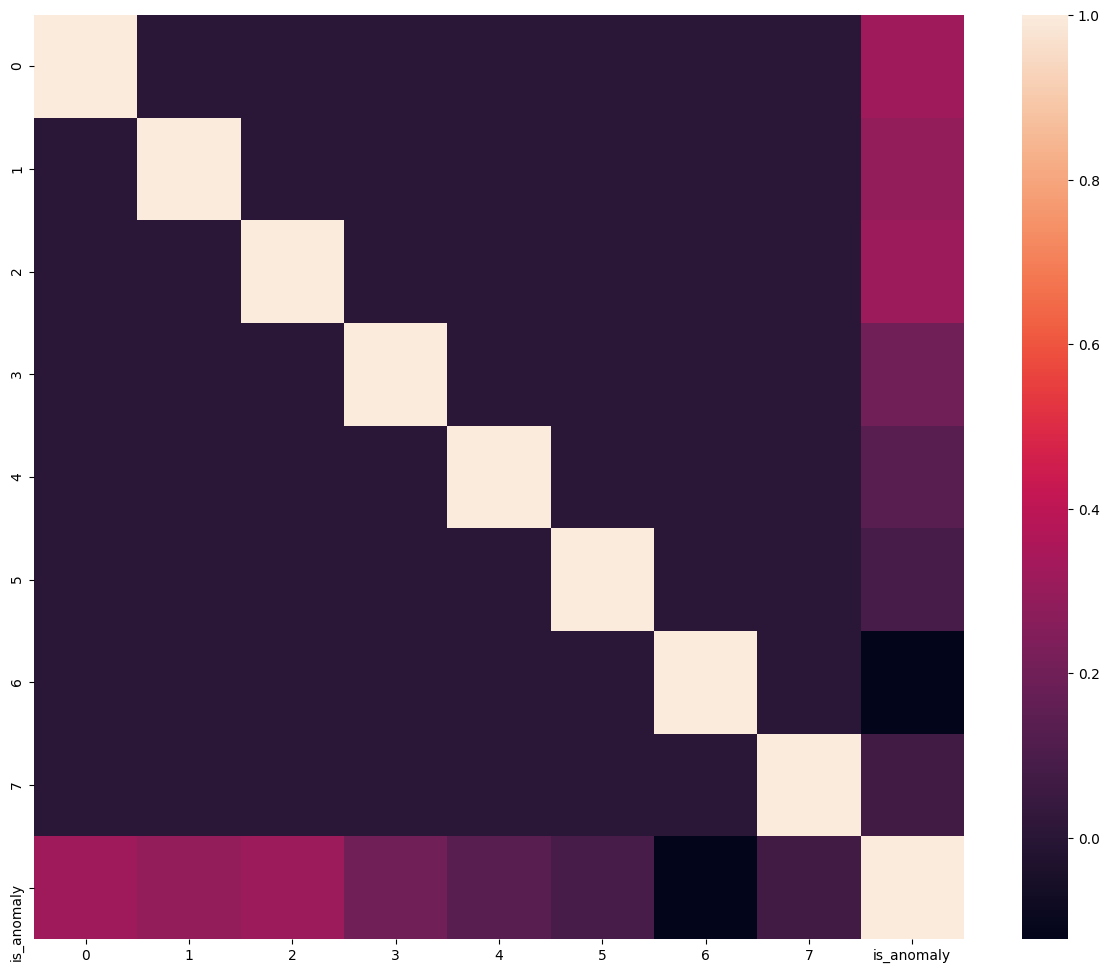

In [5]:
plot_df = pca_df.copy()

corr = plot_df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

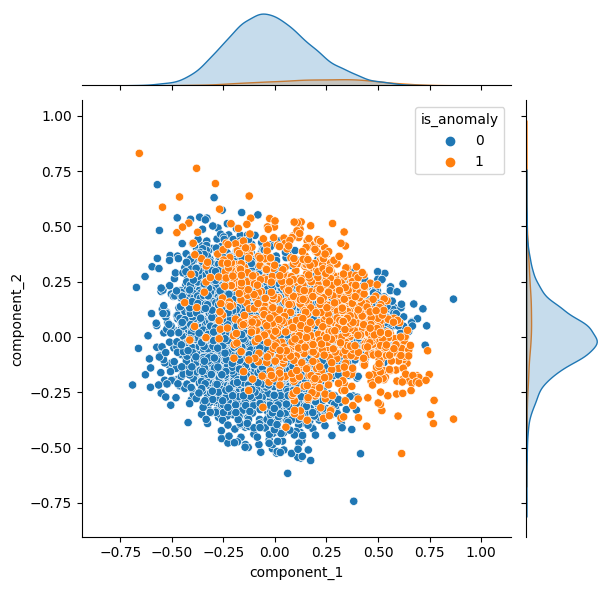

In [6]:
plot_df = plot_df.iloc[:,[1, 3, 8]]
plot_df.columns = ["component_1", "component_2", "is_anomaly"]

# Scatter plot of 2 features
sns.jointplot(data = plot_df, x="component_1", y="component_2", hue = "is_anomaly", kind='scatter')

In [7]:
all_data = pd.DataFrame(X_scaled)
all_data['is_anomaly'] = y

X = all_data.drop(['is_anomaly'], axis = 1)
y = all_data['is_anomaly']
display(all_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,is_anomaly
0,0.470176,0.405450,0.593196,0.435651,0.672981,0.321233,0.322670,0.666585,0.633211,0.614570,0.380595,0.355740,0.671178,0.475886,0.367691,0.560176,0
1,0.377430,0.319853,0.212460,0.556318,0.416597,0.796035,0.706136,0.397769,0.377845,0.274508,0.481666,0.749049,0.541606,0.669586,0.478493,0.733378,1
2,0.436690,0.443980,0.309410,0.580912,0.365964,0.569023,0.441517,0.412380,0.558971,0.354796,0.691194,0.479551,0.586210,0.551285,0.317863,0.719511,0
3,0.507103,0.362746,0.321652,0.470923,0.573033,0.505175,0.339145,0.280416,0.458646,0.300234,0.787079,0.629678,0.486046,0.639609,0.478381,0.521159,0
4,0.431895,0.481452,0.456081,0.560770,0.598296,0.392141,0.454392,0.683338,0.661973,0.486683,0.443695,0.337938,0.609601,0.417759,0.411614,0.545978,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.247939,0.479135,0.237849,0.563011,0.347123,0.688849,0.565561,0.547353,0.467595,0.445422,0.406463,0.593803,0.651049,0.448887,0.590426,0.655781,0
9996,0.605072,0.463835,0.453464,0.267458,0.603464,0.631628,0.650721,0.426775,0.548789,0.586183,0.612570,0.616262,0.375822,0.690430,0.472715,0.614208,1
9997,0.405282,0.443128,0.326708,0.517402,0.607711,0.466218,0.348438,0.422759,0.566109,0.427692,0.584356,0.525342,0.537841,0.459894,0.600851,0.402436,0
9998,0.512601,0.282344,0.228789,0.604517,0.565385,0.662392,0.560434,0.251965,0.574030,0.217322,0.608397,0.632864,0.451485,0.647734,0.374540,0.563982,0


In [8]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=42, stratify=all_data['is_anomaly'])

print(y_train.value_counts())
print(y_test.value_counts())

is_anomaly
0    7200
1     800
Name: count, dtype: int64
is_anomaly
0    1800
1     200
Name: count, dtype: int64


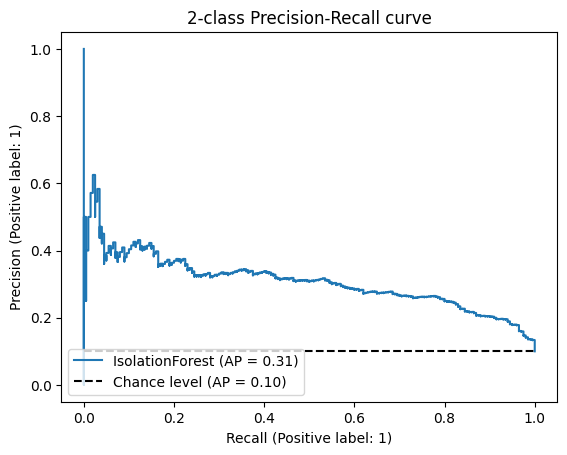

In [9]:
clf_IF = IsolationForest(random_state=42).fit(X_train)

y_train_pred = clf_IF.predict(X_train) * -1
y_train_pred[y_train_pred == -1] = 0
confusion_matrix(y_train, y_train_pred)

y_test_pred = clf_IF.predict(X_test) * -1
y_test_pred[y_test_pred == -1] = 0
confusion_matrix(y_test, y_test_pred)

y_score = clf_IF.decision_function(X_test) * -1

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="IsolationForest", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

[[1791    9]
 [  34  166]]


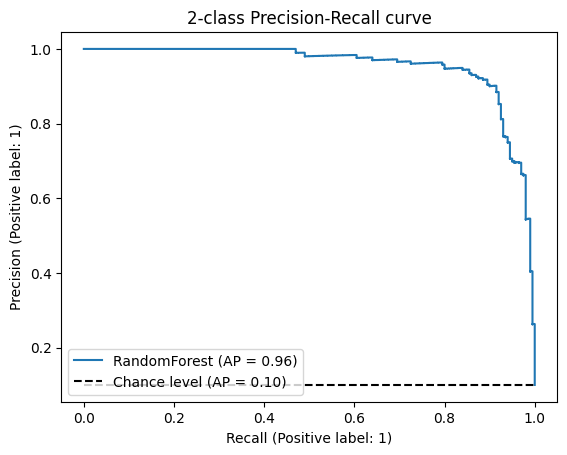

In [10]:
clf_RF = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state=42).fit(X_train, y_train)

y_test_pred = clf_RF.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))

y_score = clf_RF.predict_proba(X_test)[:,1]

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="RandomForest", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [11]:
X_train_normals = X_train[y_train == 0]
X_train_normals.shape

(7200, 16)

In [12]:
n_features = 16

# model
encoder = models.Sequential(name='encoder')
encoder.add(layer=layers.Dense(units=16, activation='relu', input_shape=(n_features,)))
encoder.add(layers.Dropout(0.2))
encoder.add(layer=layers.Dense(units=8, activation='relu'))

decoder = models.Sequential(name='decoder')
decoder.add(layer=layers.Dense(units=8, activation='relu', input_shape=(8,)))
decoder.add(layers.Dropout(0.2))
decoder.add(layer=layers.Dense(units=16, activation='relu'))
decoder.add(layers.Dropout(0.2))
decoder.add(layer=layers.Dense(units=n_features, activation='sigmoid'))

autoencoder = models.Sequential([encoder, decoder])

autoencoder.compile(
    loss=losses.mean_squared_error,
    optimizer=optimizers.Adam(),
    metrics=[metrics.mean_squared_error])

autoencoder.save_weights('init.h5')

print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
Total params: 408 (1.59 KB)
Trainable params: 408 (1.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropou

Epoch 1/50
225/225 [==============================] - 1s 2ms/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 2/50
225/225 [==============================] - 0s 2ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 3/50
225/225 [==============================] - 0s 2ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 4/50
225/225 [==============================] - 0s 2ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 5/50
225/225 [==============================] - 0s 2ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 6/50
225/225 [==============================] - 0s 2ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 7/50
225/225 [========

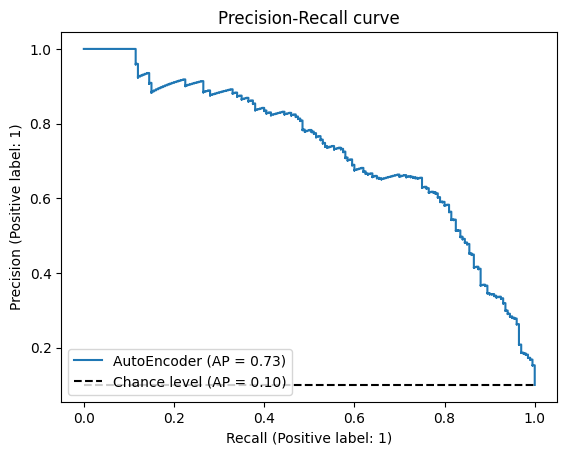

In [13]:
autoencoder.load_weights('init.h5')

es = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, restore_best_weights=True)

history = autoencoder.fit(x=X_train_normals, y=X_train_normals, epochs=50, 
                      batch_size=32, shuffle=True, verbose=1, 
                      validation_data=(X_train_normals, X_train_normals), 
                      callbacks=[es])

predicted_test = autoencoder.predict(x=X_test)

y_score = losses.mean_squared_error(predicted_test, X_test)

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="AutoEncoder", plot_chance_level=True
)
_ = display.ax_.set_title("Precision-Recall curve")

Epoch 1/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 7/50
250/250 [========

232/232 [==============================] - 0s 2ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 4/50
232/232 [==============================] - 0s 2ms/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 5/50
232/232 [==============================] - 0s 2ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 6/50
232/232 [==============================] - 0s 2ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 7/50
232/232 [==============================] - 0s 2ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 8/50
232/232 [==============================] - 0s 2ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 9/50
232/232 [===================

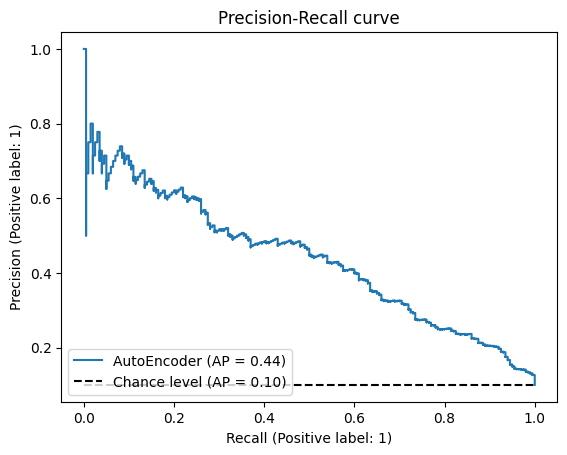

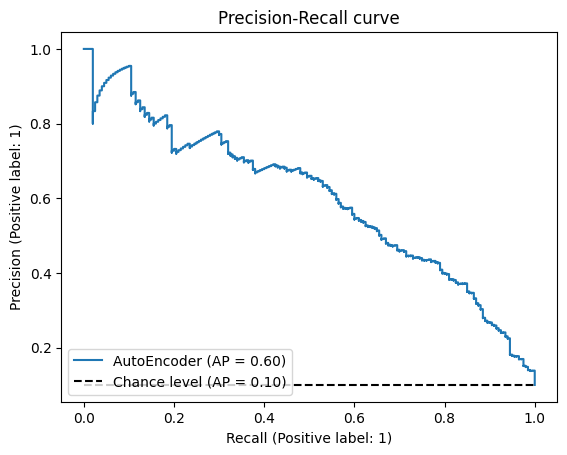

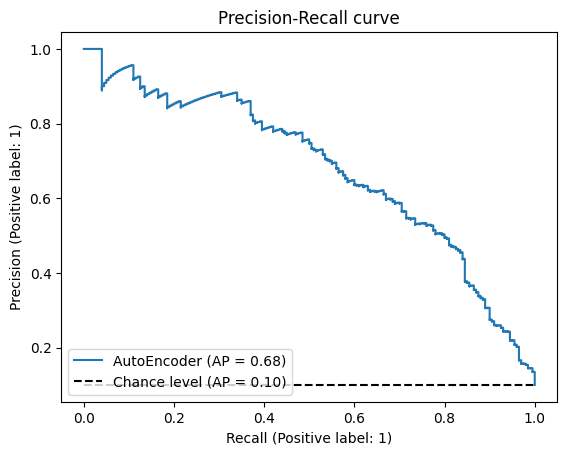

In [14]:
es = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, restore_best_weights=True)

n_vec = [1000, 1000, 1000]

for i in range(3):
    
    autoencoder.load_weights('init.h5')

    history = autoencoder.fit(x=X_train, y=X_train, epochs=50, 
                          batch_size=32, shuffle=True, verbose=1, 
                          validation_data=(X_train, X_train), 
                          callbacks=[es])
    
    predicted_test = autoencoder.predict(x=X_test)

    y_score = losses.mean_squared_error(predicted_test, X_test)

    display = PrecisionRecallDisplay.from_predictions(
        y_test, y_score, name="AutoEncoder", plot_chance_level=True
    )
    _ = display.ax_.set_title("Precision-Recall curve")
    
    predicted_train = autoencoder.predict(x=X_train)

    y_score = losses.mean_squared_error(predicted_train, X_train)
    
    y_train_pred = np.array([0] * len(y_train))
    y_train_pred[np.argsort(y_score)[-n_vec[i]:]] = 1
    print(confusion_matrix(y_train, y_train_pred))
    print(len(np.where((y_train == y_train_pred) & (y_train_pred == 1))[0]))
    print(len(np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]))
    
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    print(X_train.shape)
    retain_index = np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]
    print(len(retain_index))
    X_train = X_train.iloc[retain_index, :]
    y_train = y_train[retain_index]
    print(X_train.shape)
    print(y_train.shape)
    

In [15]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=42, stratify=all_data['is_anomaly'])

print(y_train.value_counts())
print(y_test.value_counts())

X_train_normals = X_train[y_train == 0]
print(X_train_normals.shape)

is_anomaly
0    7200
1     800
Name: count, dtype: int64
is_anomaly
0    1800
1     200
Name: count, dtype: int64
(7200, 16)


[[6490  710]
 [ 510  290]]
290
7710
(8000, 16)
7710
(7710, 16)
(7710,)
[[6365  835]
 [ 345  165]]
165
7545
(7710, 16)
7545
(7545, 16)
(7545,)
[[6307  893]
 [ 238  107]]
107
7438
(7545, 16)
7438
(7438, 16)
(7438,)


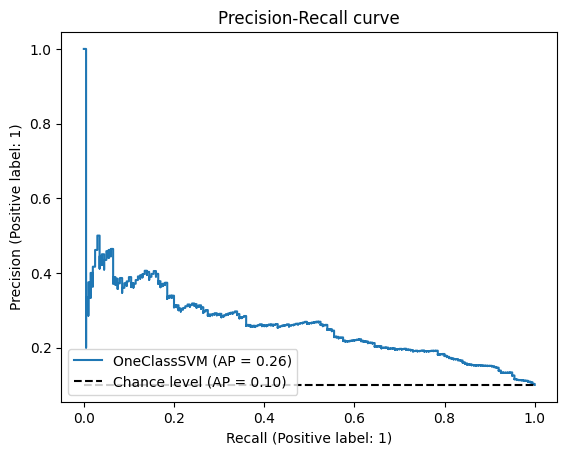

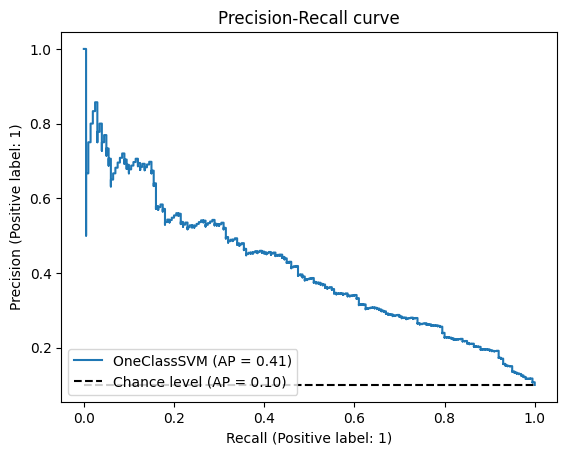

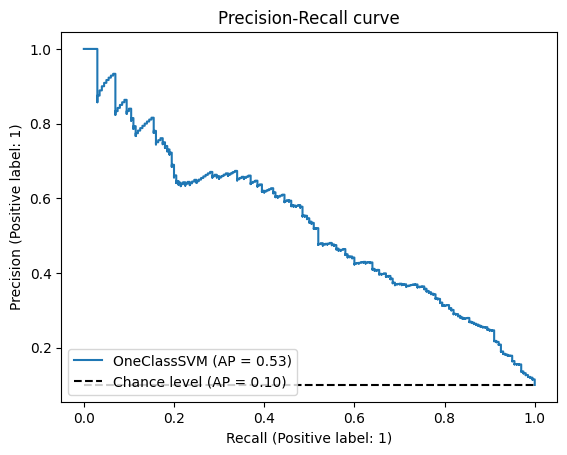

In [16]:
clf = OneClassSVM(gamma='scale', nu=0.1)

n_vec = [1000, 1000, 1000]

for i in range(3):

    clf.fit(X_train)
    
    y_score = clf.decision_function(X_test) * -1

    display = PrecisionRecallDisplay.from_predictions(
        y_test, y_score, name="OneClassSVM", plot_chance_level=True
    )
    _ = display.ax_.set_title("Precision-Recall curve")
    
    y_score = clf.decision_function(X_train) * -1
    
    y_train_pred = np.array([0] * len(y_train))
    y_train_pred[np.argsort(y_score)[-n_vec[i]:]] = 1
    print(confusion_matrix(y_train, y_train_pred))
    print(len(np.where((y_train == y_train_pred) & (y_train_pred == 1))[0]))
    print(len(np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]))
    
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    print(X_train.shape)
    retain_index = np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]
    print(len(retain_index))
    X_train = X_train.iloc[retain_index, :]
    y_train = y_train[retain_index]
    print(X_train.shape)
    print(y_train.shape)
    

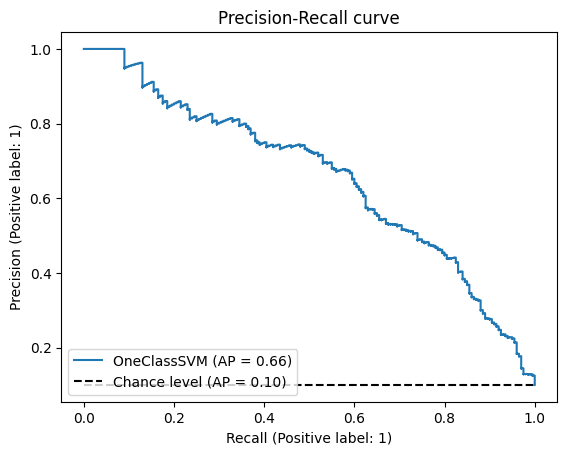

In [17]:
clf.fit(X_train_normals)
    
y_score = clf.decision_function(X_test) * -1

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="OneClassSVM", plot_chance_level=True
)
_ = display.ax_.set_title("Precision-Recall curve")

In [18]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=42, stratify=all_data['is_anomaly'])

print(y_train.value_counts())
print(y_test.value_counts())

X_train_normals = X_train[y_train == 0]
print(X_train_normals.shape)

is_anomaly
0    7200
1     800
Name: count, dtype: int64
is_anomaly
0    1800
1     200
Name: count, dtype: int64
(7200, 16)


[[6586  614]
 [ 414  386]]
386
7614
(8000, 16)
7614
(7614, 16)
(7614,)
[[6344  856]
 [ 270  144]]
144
7470
(7614, 16)
7470
(7470, 16)
(7470,)
[[6250  950]
 [ 220   50]]
50
7420
(7470, 16)
7420
(7420, 16)
(7420,)


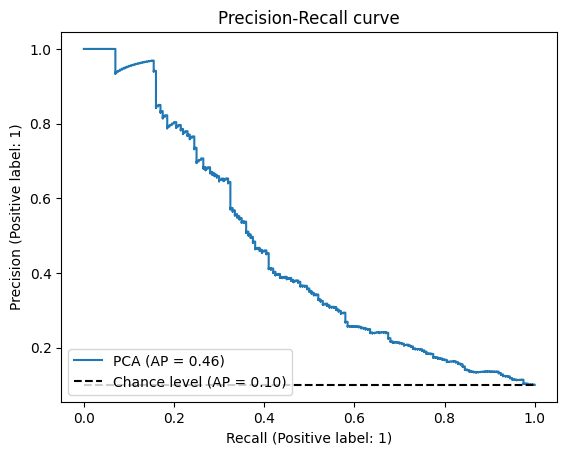

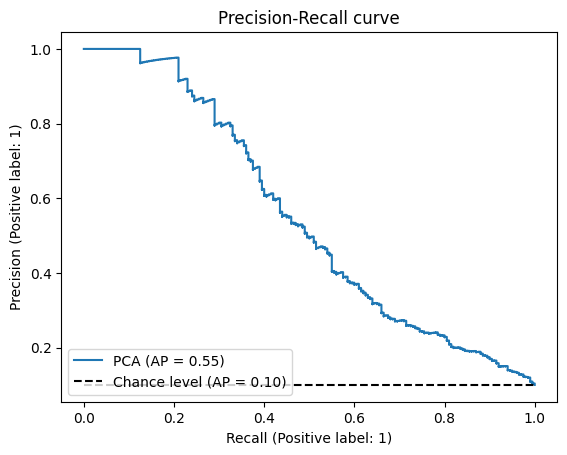

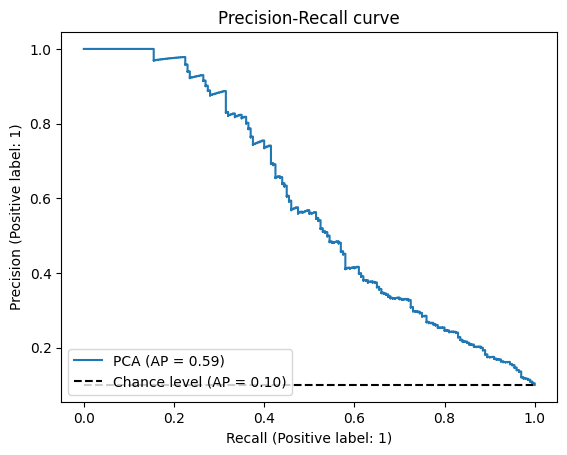

In [19]:
n_vec = [1000, 1000, 1000]

for i in range(3):
    
    pca = PCA(n_components=6, random_state=42)
    pca_train = pd.DataFrame(pca.fit_transform(X_train))
    pca_test = pd.DataFrame(pca.transform(X_test))
    
    predicted_test = pd.DataFrame(pca.inverse_transform(pca_test))

    y_score = losses.mean_squared_error(predicted_test, X_test)

    display = PrecisionRecallDisplay.from_predictions(
        y_test, y_score, name="PCA", plot_chance_level=True
    )
    _ = display.ax_.set_title("Precision-Recall curve")
    
    predicted_train = pd.DataFrame(pca.inverse_transform(pca_train))

    y_score = losses.mean_squared_error(predicted_train, X_train)
    
    y_train_pred = np.array([0] * len(y_train))
    y_train_pred[np.argsort(y_score)[-n_vec[i]:]] = 1
    print(confusion_matrix(y_train, y_train_pred))
    print(len(np.where((y_train == y_train_pred) & (y_train_pred == 1))[0]))
    print(len(np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]))
    
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    print(X_train.shape)
    retain_index = np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]
    print(len(retain_index))
    X_train = X_train.iloc[retain_index, :]
    y_train = y_train[retain_index]
    print(X_train.shape)
    print(y_train.shape)

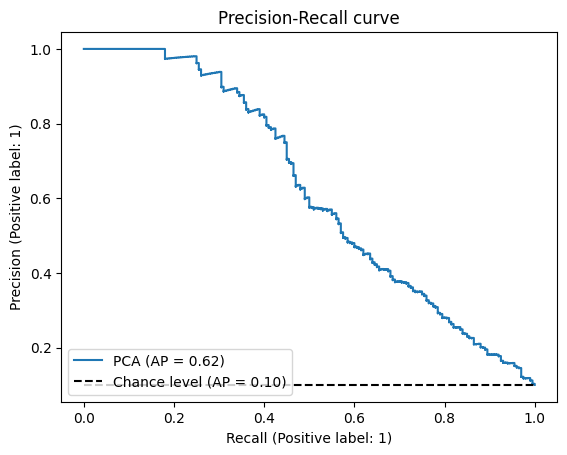

In [20]:
pca = PCA(n_components=6, random_state=42)
pca_train = pd.DataFrame(pca.fit_transform(X_train_normals))
pca_test = pd.DataFrame(pca.transform(X_test))

predicted_test = pd.DataFrame(pca.inverse_transform(pca_test))

y_score = losses.mean_squared_error(predicted_test, X_test)

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="PCA", plot_chance_level=True
)
_ = display.ax_.set_title("Precision-Recall curve")